In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
x = np.linspace(0,50,501)

In [6]:
y = np.sin(x)

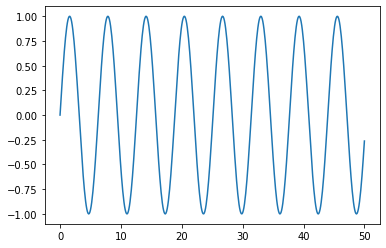

In [7]:
plt.plot(x,y)

In [8]:
df= pd.DataFrame(data=y,index=x,columns=['Sine'])

In [9]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [10]:
len(df)

501

In [11]:
test_percent=0.1

In [12]:
test_point=np.round(len(df)*test_percent)

In [13]:
test_ind = int(len(df)-test_point)

In [14]:
test_ind

451

In [15]:
train = df.iloc[:test_ind]

In [16]:
test = df.iloc[test_ind:]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = scaler.transform(train)

In [22]:
scaled_test = scaler.transform(test)

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`

In [44]:
length = 50
batch_size=1 

generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [45]:
len(scaled_train)

451

In [46]:
len(generator)

401

In [47]:
X,y = generator[0]

In [48]:
X


array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [49]:
y

array([[0.02053313]])

In [50]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,GRU

In [51]:
n_features=1

In [54]:
model=Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit_generator(generator,epochs=5)

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
401/401 [==============================] - 6s 11ms/step - loss: 0.0023
Epoch 2/5
401/401 [==============================] - 4s 10ms/step - loss: 3.5185e-05
Epoch 3/5
401/401 [==============================] - 4s 10ms/step - loss: 7.6044e-04
Epoch 4/5
401/401 [==============================] - 4s 10ms/step - loss: 1.4774e-05
Epoch 5/5
401/401 [==============================] - 4s 10ms/step - loss: 1.3916e-05


In [57]:
loss=pd.DataFrame(model.history.history)

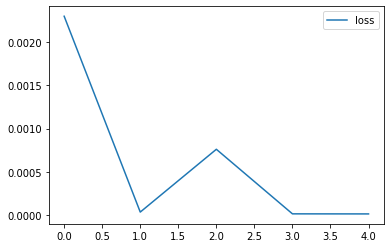

In [58]:
loss.plot()

In [59]:
first_eval_batch = scaled_train[-length:]

In [60]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))
model.predict(first_eval_batch)

array([[0.94907373]], dtype=float32)

In [61]:
scaled_test[0]

array([0.94955134])

In [64]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range (len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [65]:
test_predictions

[array([0.94907373], dtype=float32),
 array([0.96802807], dtype=float32),
 array([0.98187196], dtype=float32),
 array([0.99042517], dtype=float32),
 array([0.9935106], dtype=float32),
 array([0.99121165], dtype=float32),
 array([0.9835694], dtype=float32),
 array([0.97076815], dtype=float32),
 array([0.95304334], dtype=float32),
 array([0.9306578], dtype=float32),
 array([0.9039774], dtype=float32),
 array([0.8733462], dtype=float32),
 array([0.8391667], dtype=float32),
 array([0.8017987], dtype=float32),
 array([0.76165366], dtype=float32),
 array([0.71913713], dtype=float32),
 array([0.67461276], dtype=float32),
 array([0.6284572], dtype=float32),
 array([0.58103883], dtype=float32),
 array([0.5327451], dtype=float32),
 array([0.48395804], dtype=float32),
 array([0.43504974], dtype=float32),
 array([0.38648063], dtype=float32),
 array([0.3386574], dtype=float32),
 array([0.2920629], dtype=float32),
 array([0.2471637], dtype=float32),
 array([0.20448287], dtype=float32),
 array([0.164

In [66]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [83]:
true_predictions=scaler.inverse_transform(test_predictions)

In [71]:
test['Predictions']= true_predictions

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
test.head()

,Sine,Predictions
45.1,0.899097,0.898142
45.2,0.938307,0.936050
45.3,0.968142,0.963738
45.4,0.988304,0.980844
45.5,0.998591,0.987015


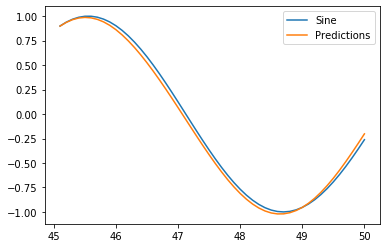

In [73]:
test.plot()

In [74]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stopping = EarlyStopping(monitor='val_loss',patience=2)

In [80]:
length = 49 
generator= TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)




validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [81]:
model=Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [82]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=early_stopping)

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
402/402 [==============================] - 13s 22ms/step - loss: 0.0109 - val_loss: 4.9619e-05
Epoch 2/20
402/402 [==============================] - 8s 19ms/step - loss: 1.8937e-04 - val_loss: 2.3414e-04
Epoch 3/20
402/402 [==============================] - 8s 19ms/step - loss: 4.6218e-04 - val_loss: 4.3553e-06
Epoch 4/20
402/402 [==============================] - 7s 18ms/step - loss: 6.0150e-05 - val_loss: 2.4738e-06
Epoch 5/20
402/402 [==============================] - 7s 19ms/step - loss: 5.2686e-05 - val_loss: 8.4810e-05
Epoch 6/20
402/402 [==============================] - 7s 18ms/step - loss: 2.0554e-04 - val_loss: 6.9142e-07
Epoch 7/20
402/402 [==============================] - 7s 18ms/step - loss: 1.5068e-04 - val_loss: 5.7213e-05
Epoch 8/20
402/402 [==============================] - 8s 19ms/step - loss: 2.0925e-04 - val_loss: 4.5238e-05


In [84]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range (len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


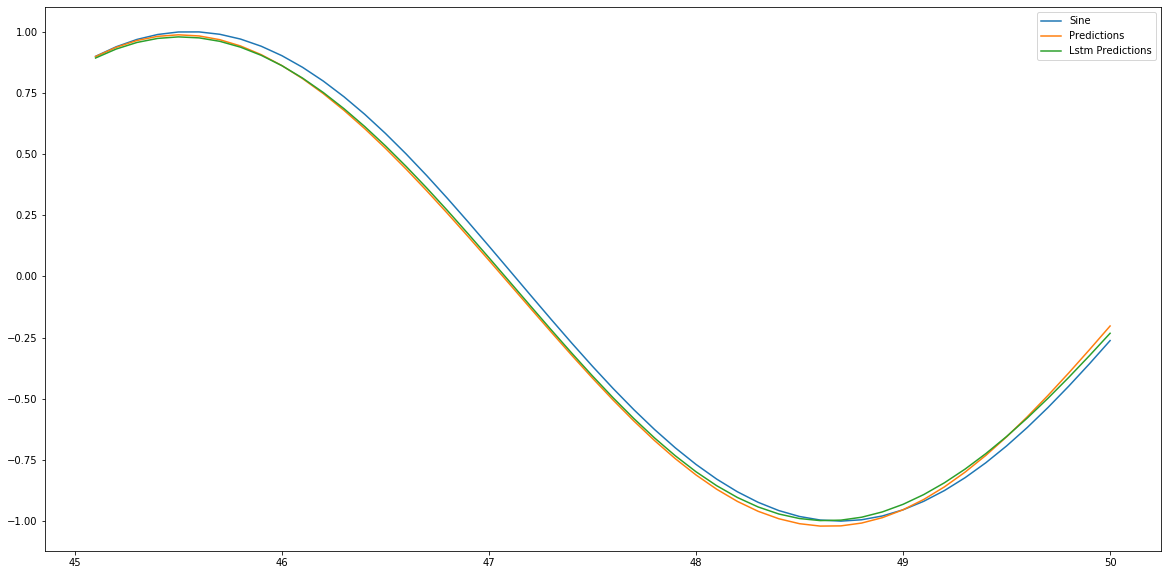

In [88]:
true_predictions=scaler.inverse_transform(test_predictions)
test['Lstm Predictions']=true_predictions
test.plot(figsize=(20,10))

In [92]:
full_scaler = MinMaxScaler()

In [94]:
scaled_full_data=full_scaler.fit_transform(df)

In [95]:
generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)

In [96]:
model=Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [97]:
model.fit_generator(generator,epochs=8)

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
452/452 [==============================] - 14s 23ms/step - loss: 0.0115
Epoch 2/8
452/452 [==============================] - 9s 20ms/step - loss: 5.3718e-05
Epoch 3/8
452/452 [==============================] - 8s 19ms/step - loss: 2.2800e-04
Epoch 4/8
452/452 [==============================] - 8s 19ms/step - loss: 1.8896e-04
Epoch 5/8
452/452 [==============================] - 8s 19ms/step - loss: 8.4650e-05
Epoch 6/8
452/452 [==============================] - 8s 19ms/step - loss: 3.7700e-04
Epoch 7/8
452/452 [==============================] - 8s 19ms/step - loss: 1.0686e-04
Epoch 8/8
452/452 [==============================] - 9s 19ms/step - loss: 5.3486e-05


In [98]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range (25):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [99]:
forecast=scaler.inverse_transform(forecast)

In [100]:
forecast

array([[ 0.8992273 ],
       [ 0.93779131],
       [ 0.96711716],
       [ 0.98703008],
       [ 0.99748178],
       [ 0.9985332 ],
       [ 0.99034407],
       [ 0.97316042],
       [ 0.9473002 ],
       [ 0.91314284],
       [ 0.87111988],
       [ 0.82170135],
       [ 0.76539353],
       [ 0.70272965],
       [ 0.63426818],
       [ 0.56059147],
       [ 0.48230724],
       [ 0.40005087],
       [ 0.31448658],
       [ 0.22631211],
       [ 0.13626285],
       [ 0.0451108 ],
       [-0.04633314],
       [-0.13722335],
       [-0.22668629]])

In [102]:
forecast_index=np.arange(50.1,52.6,step=0.1)

C:\Users\admin\anaconda3\envs\mytfenv\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]


ValueError: x and y must have same first dimension, but have shapes (501,) and (1,)

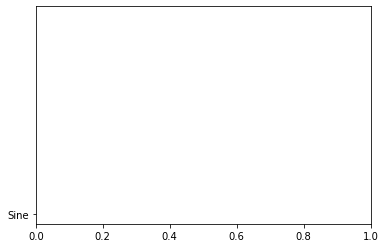

In [103]:
plt.plot(df.index,['Sine'])
plt.plot(forecast_index,forecast)